# <font color = 'purple'> <u> _**Lab ~ 2**_ </u> </font>



### <font color = 'Orange'> <u> _**Part A**_  </u> </font>

![Spam](https://www.ashbycomputers.co.uk/wp-content/uploads/2014/08/anti-spam.jpg)

In [127]:
import pandas as pd
df1 = pd.read_csv("C:\\Users\krath\\OneDrive\\Documents\\Cluster2023\\Artificial Intelligence Algorith\\CSV_lab2\\Lab2_dataset.csv")
df1.head()

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\nth...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\n( see a...",0
2,3624,ham,"Subject: neon retreat\nho ho ho , we ' re arou...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\nthis deal is to ...,0


In [128]:
df1.text.iloc[0:5]

0    Subject: enron methanol ; meter # : 988291\nth...
1    Subject: hpl nom for january 9 , 2001\n( see a...
2    Subject: neon retreat\nho ho ho , we ' re arou...
3    Subject: photoshop , windows , office . cheap ...
4    Subject: re : indian springs\nthis deal is to ...
Name: text, dtype: object

In [129]:
# Check content of label_num
df1.label_num

0       0
1       0
2       0
3       1
4       0
       ..
5166    0
5167    0
5168    0
5169    0
5170    1
Name: label_num, Length: 5171, dtype: int64

In [130]:
# Check the type of each feature
df1.dtypes

Unnamed: 0     int64
label         object
text          object
label_num      int64
dtype: object

In [131]:
# Check column's name
df1.columns

Index(['Unnamed: 0', 'label', 'text', 'label_num'], dtype='object')

In [132]:
df1.shape

(5171, 4)

In [133]:
# Drop irrelevant features 
df1 = df1.drop(["Unnamed: 0", "label_num"], axis=1)
df1.head() 

,label,text
0,ham,Subject: enron methanol ; meter # : 988291\nth...
1,ham,"Subject: hpl nom for january 9 , 2001\n( see a..."
2,ham,"Subject: neon retreat\nho ho ho , we ' re arou..."
3,spam,"Subject: photoshop , windows , office . cheap ..."
4,ham,Subject: re : indian springs\nthis deal is to ...


In [134]:
df1.groupby('label').describe()

text                                                               
      count unique                                                top freq
label                                                                     
ham    3672   3531  Subject: calpine daily gas nomination\n>\nrick...   20
spam   1499   1462                                        Subject: \n   16

In [135]:
df1.text[0]

"Subject: enron methanol ; meter # : 988291\nthis is a follow up to the note i gave you on monday , 4 / 3 / 00 { preliminary\nflow data provided by daren } .\nplease override pop ' s daily volume { presently zero } to reflect daily\nactivity you can obtain from gas control .\nthis change is needed asap for economics purposes ."

In [136]:
# Convert spam to 1 and ham to 0 
df1['Spam']=df1['label'].apply(lambda x: 1 if x=='spam' else 0)
df1.head()

,label,text,Spam
0,ham,Subject: enron methanol ; meter # : 988291\nth...,0
1,ham,"Subject: hpl nom for january 9 , 2001\n( see a...",0
2,ham,"Subject: neon retreat\nho ho ho , we ' re arou...",0
3,spam,"Subject: photoshop , windows , office . cheap ...",1
4,ham,Subject: re : indian springs\nthis deal is to ...,0


> <font color = '#A9A9A9'>  <i> </b>  We have converted the 'label' column into a new column 'spam' with numeric values indicating spam (1) or not spam (0), we can now drop the original'label' column because it is no longer needed. </b> </i> </font>


In [137]:
df1 = df1.drop(["label"], axis = 1)
df1.head()

,text,Spam
0,Subject: enron methanol ; meter # : 988291\nth...,0
1,"Subject: hpl nom for january 9 , 2001\n( see a...",0
2,"Subject: neon retreat\nho ho ho , we ' re arou...",0
3,"Subject: photoshop , windows , office . cheap ...",1
4,Subject: re : indian springs\nthis deal is to ...,0


In [138]:
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
def clean_text(text):
    # Remove special characters and numbers
    text = re.sub('[^a-zA-Z]', ' ', text)
    
    # Convert text to lowercase
    text = text.lower()
    
    # Split text into individual words
    words = text.split()
    
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]
    
    # Lemmatize words
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words]
    
    # Join words back into a single string
    cleaned_text = ' '.join(words)
    
    return cleaned_text
df1['cleanedText'] = df1['text'].apply(clean_text)


In [139]:
#df1['cleaned_text'][0]
df1.drop('text', axis=1, inplace=True)

In [140]:
df1.head(2)

,Spam,cleanedText
0,0,subject enron methanol meter follow note gave ...
1,0,subject hpl nom january see attached file hpln...


In [141]:
# Splitting the data into 'train_set & tests_set'

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import GaussianNB,MultinomialNB
from sklearn.model_selection import train_test_split, cross_val_score


X_train, X_test, y_train, y_test = train_test_split(df1.cleanedText,df1.Spam,test_size=0.2, random_state=22)

In [142]:
print("Training data ----| X:", X_train.shape, "y:", y_train.shape)
print("Testing data  ----| X:", X_test.shape, "y:", y_test.shape)


Training data ----| X: (4136,) y: (4136,)
Testing data  ----| X: (1035,) y: (1035,)


>  <font color = '#A9A9A9'>  <i> </b> Let's try both vectorizers 'Countvectorizer' and Tfi-IDF'and compare their performance </b></i> </font>

In [143]:

###################
# CountVectorizer #
###################
# Create and fit the CountVectorizer
count_vectorizer = CountVectorizer()
X_train_count = count_vectorizer.fit_transform(X_train)
X_test_count = count_vectorizer.transform(X_test)

###################
# TfidfVectorizer #
###################
# Create and fit the TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

#######################################################
# Gaussian Naive Bayes classifier for CountVectorizer #
#######################################################
# Train the Gaussian Naive Bayes classifier using CountVectorizer
gnb_count = GaussianNB()
gnb_count.fit(X_train_count.toarray(), y_train)

#######################################################
# Gaussian Naive Bayes classifier for TfidfVectorizer #
#######################################################
# Train the Gaussian Naive Bayes classifier using TfidfVectorizer
gnb_tfidf = GaussianNB()
gnb_tfidf.fit(X_train_tfidf.toarray(), y_train)

##########################################################
# Multinomial Naive Bayes classifier for CountVectorizer #
##########################################################
# Train the Multinomial Naive Bayes classifier using CountVectorizer
nb_count = MultinomialNB()
nb_count.fit(X_train_count, y_train)

##########################################################
# Multinomial Naive Bayes classifier for TfidfVectorizer #
##########################################################
# Train the Multinomial Naive Bayes classifier using TfidfVectorizer
nb_tfidf = MultinomialNB()
nb_tfidf.fit(X_train_tfidf, y_train)

####################
# Cross validation #
####################
# Perform cross-validation on the models
gnb_count_scores = cross_val_score(gnb_count, X_train_count.toarray(), y_train, cv=5)
gnb_tfidf_scores = cross_val_score(gnb_tfidf, X_train_tfidf.toarray(), y_train, cv=5)
nb_count_scores = cross_val_score(nb_count, X_train_count, y_train, cv=5)
nb_tfidf_scores = cross_val_score(nb_tfidf, X_train_tfidf, y_train, cv=5)

# Print the average cross-validation scores
print("Average cross-validation score of Gaussian Naive Bayes with CountVectorizer: \n", gnb_count_scores.mean())
print("Average cross-validation score of Gaussian Naive Bayes with TfidfVectorizer: \n", gnb_tfidf_scores.mean())
print("Average cross-validation score of Multinomial Naive Bayes with CountVectorizer: \n", nb_count_scores.mean())
print("Average cross-validation score of Multinomial Naive Bayes with TfidfVectorizer: \n", nb_tfidf_scores.mean())

Average cross-validation score of Gaussian Naive Bayes with CountVectorizer: 
 0.9567241469954262
Average cross-validation score of Gaussian Naive Bayes with TfidfVectorizer: 
 0.9497120142065203
Average cross-validation score of Multinomial Naive Bayes with CountVectorizer: 
 0.9763065968023646
Average cross-validation score of Multinomial Naive Bayes with TfidfVectorizer: 
 0.9090937501825467


> <font color = 'darkgray'> <i> <b> We can conclude that the Multinomial Naive Bayes model with CountVectorizer is the best performing model among the four options </b></i> </font>

### <font color = 'Orange'> <u>_**Part B**_</u> </font>

![Airbnb](https://i0.wp.com/www.passiveairbnb.com/wp-content/uploads/2018/06/02.jpg?resize=1024%2C576&ssl=1)

In [144]:
import pandas as pd
df2 = pd.read_csv("C:\\Users\krath\\OneDrive\\Documents\\Cluster2023\\Artificial Intelligence Algorith\\CSV_lab2\\AB_NYC_2019.csv")
df2.head(4)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194


In [145]:
df2.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


> <font color = 'darkgray'> <i> <b> After loading the data, we utilized the "describe" function to obtain summary statistics for the numerical data. It became evident that the dataset requires cleaning as there are outliers present in the "price" and "minimum_nights" columns. Additionally, columns such as "number_of_reviews" and "calculated_host_listings_count" exhibit significant right skewness, suggesting a potential need to convert them into categorical variables. As a preliminary step, we will remove a subset of columns from the dataset that are deemed irrelevant or unnecessary. </b></i> </font>

In [146]:
# Drop irrelevant features 
df2.drop(['id','name','host_id','host_name'],axis=1,inplace = True)


In [147]:
df2.shape

(48895, 12)

In [148]:
# Check missing values
df2.isnull().sum()

neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

> <font color = 'darkgray'> <i> <b>The majority of columns in the dataset do not contain missing values, except for "last_review" and "reviews_per_month." These two columns are specifically related to listings that have not received any reviews. </b></i></font>

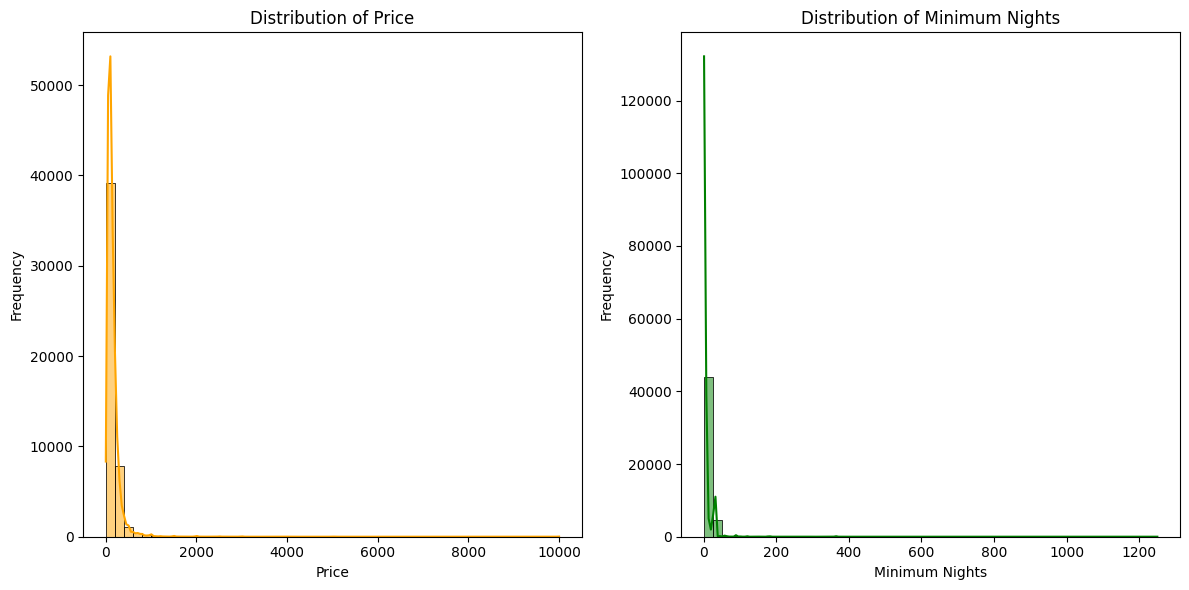

In [149]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure with subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot the distribution of 'price' with a blue line
sns.histplot(df2['price'], bins=50, kde=True, color='Orange', ax=axes[0])
axes[0].set_xlabel('Price')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Distribution of Price')

# Plot the distribution of 'minimum_nights' with a green line
sns.histplot(df2['minimum_nights'], bins=50, kde=True, color='green', ax=axes[1])
axes[1].set_xlabel('Minimum Nights')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Distribution of Minimum Nights')

# Adjust the spacing between subplots
plt.tight_layout()

# Display the figure
plt.show()

> <font color = 'darkgray'> <i> <b> We can clearly observe that we don't have a Gaussian distribution. Precisely, we have a right skewed distribution in both features 'price' and 'minimum_nights'.Therefore, it's recommended to use IQR method to remove the outliers. </b> </i> </font>

In [150]:
# Removing outliers using IQR
Q1_price = df2['price'].quantile(0.25)
Q3_price = df2['price'].quantile(0.75)
IQR_price = Q3_price - Q1_price
lower_limit_price = Q1_price - 1.5 * IQR_price
upper_limit_price = Q3_price + 1.5 * IQR_price

Q1_min_nights = df2['minimum_nights'].quantile(0.25)
Q3_min_nights = df2['minimum_nights'].quantile(0.75)
IQR_min_nights = Q3_min_nights - Q1_min_nights
lower_limit_min_nights = Q1_min_nights - 1.5 * IQR_min_nights
upper_limit_min_nights = Q3_min_nights + 1.5 * IQR_min_nights

df2_no = df2[(df2['price'] > lower_limit_price) & (df2['price'] < upper_limit_price) &
                      (df2['minimum_nights'] > lower_limit_min_nights) & (df2['minimum_nights'] < upper_limit_min_nights)]

df2_no.head(4)

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194


In [151]:
df2_no.isnull().sum()
#df2['calculated_host_listings_count']
#df2_no['minimum_nights'].unique()

neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       6691
reviews_per_month                 6691
calculated_host_listings_count       0
availability_365                     0
dtype: int64

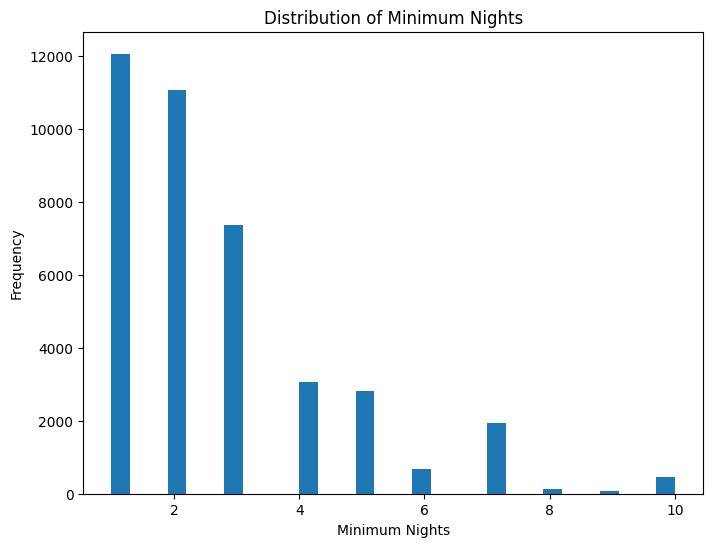

In [152]:
# Check the dist for 'minimum_nights after removing the outliers
plt.figure(figsize=(8, 6))
plt.hist(df2_no['minimum_nights'], bins=30)
plt.xlabel('Minimum Nights')
plt.ylabel('Frequency')
plt.title('Distribution of Minimum Nights')
plt.show()

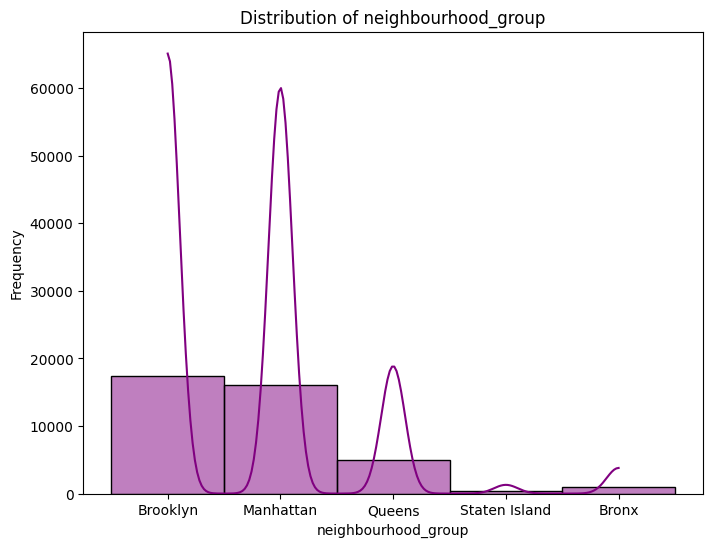

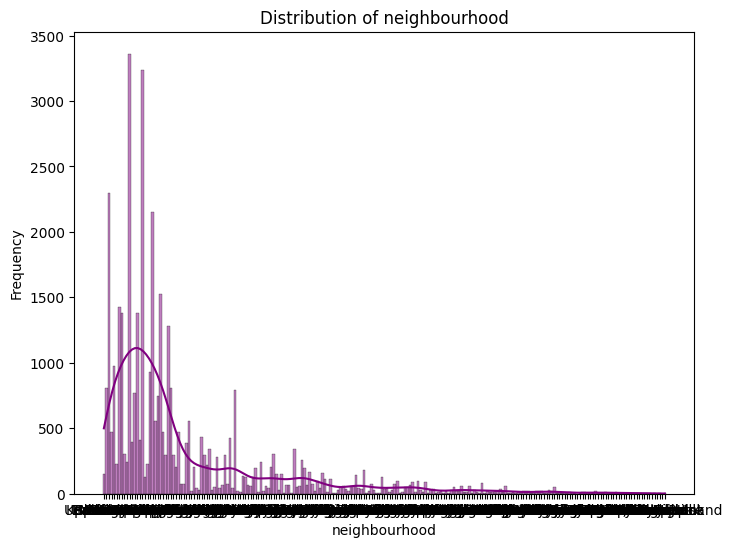

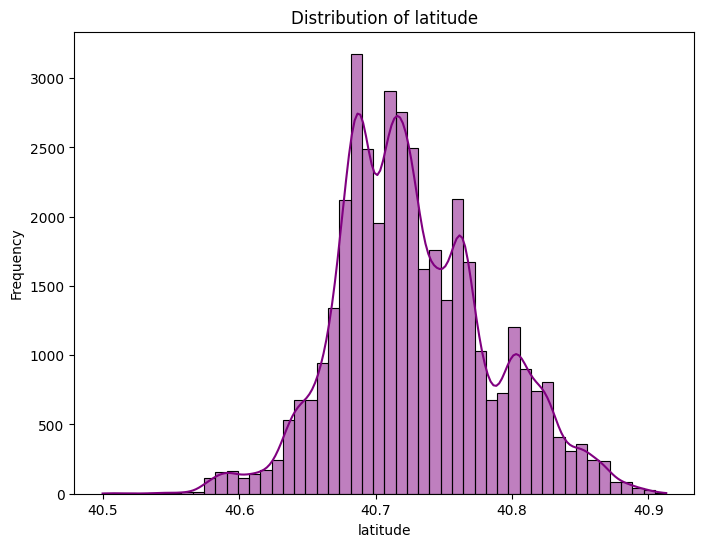

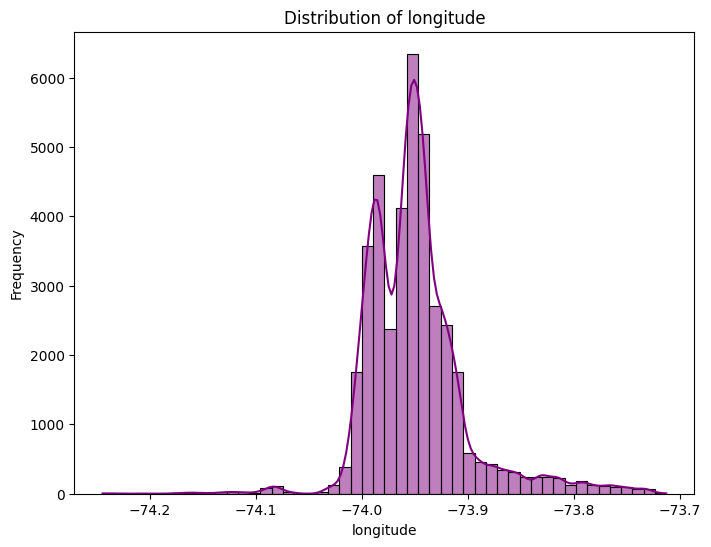

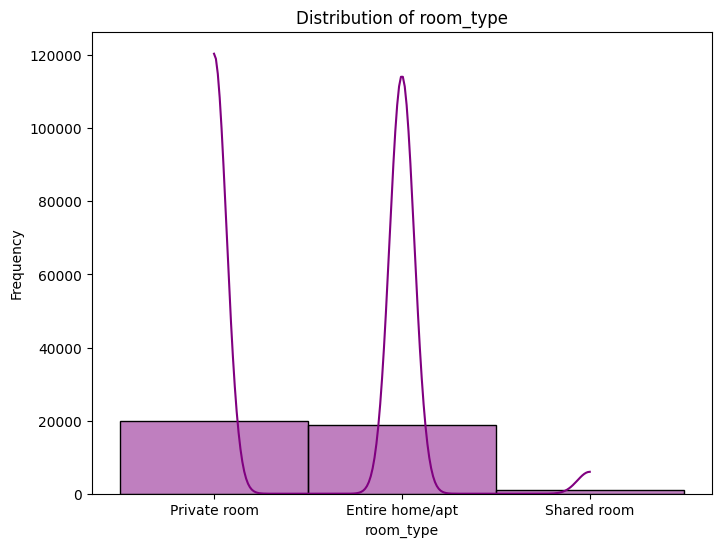

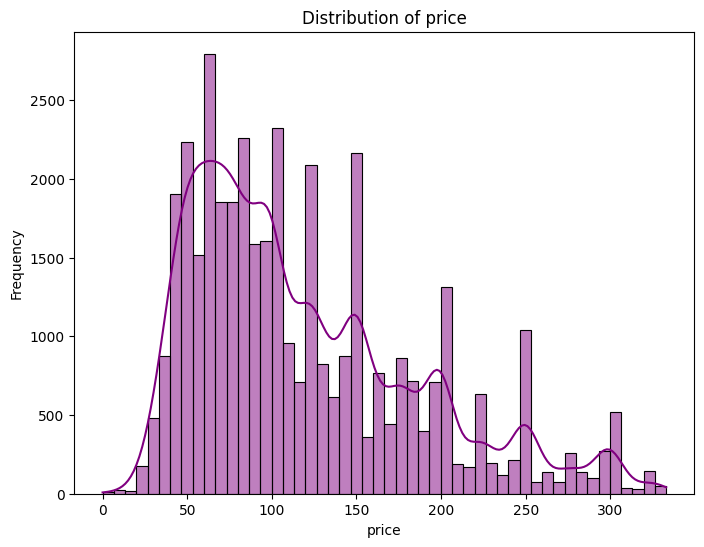

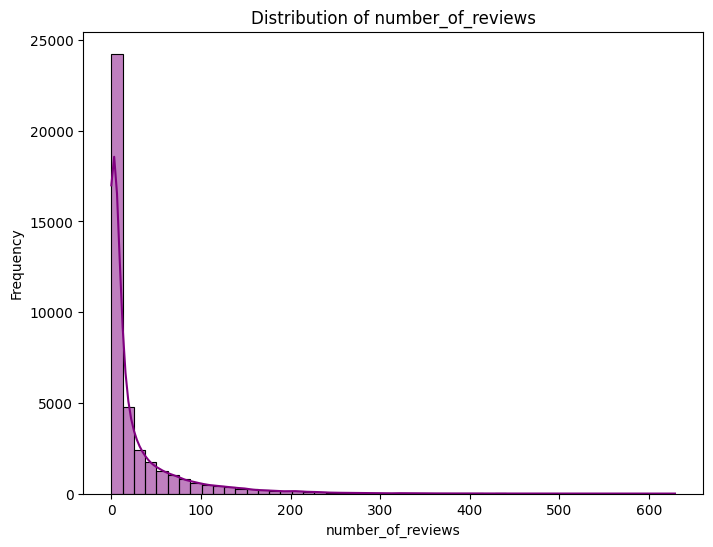

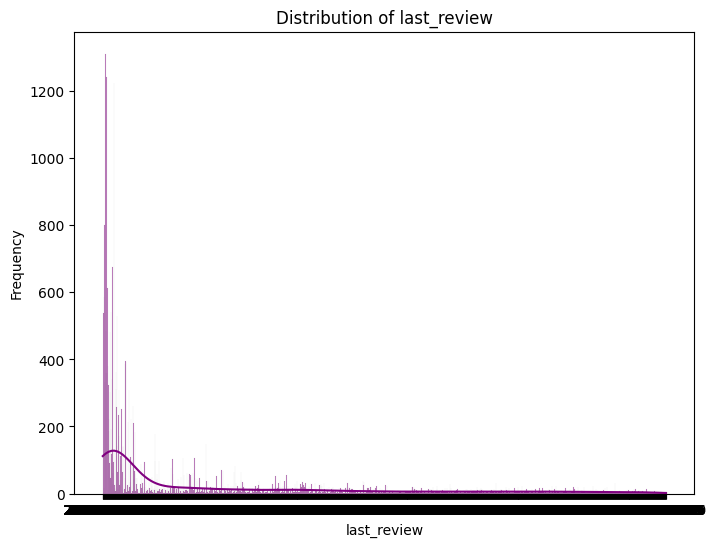

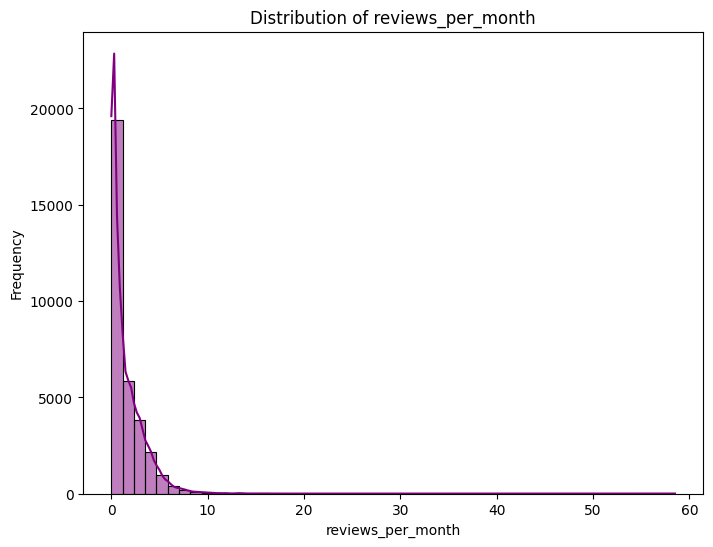

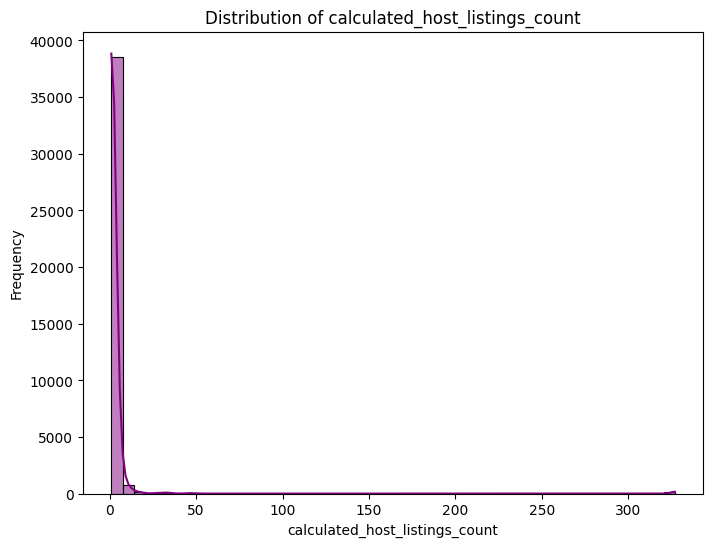

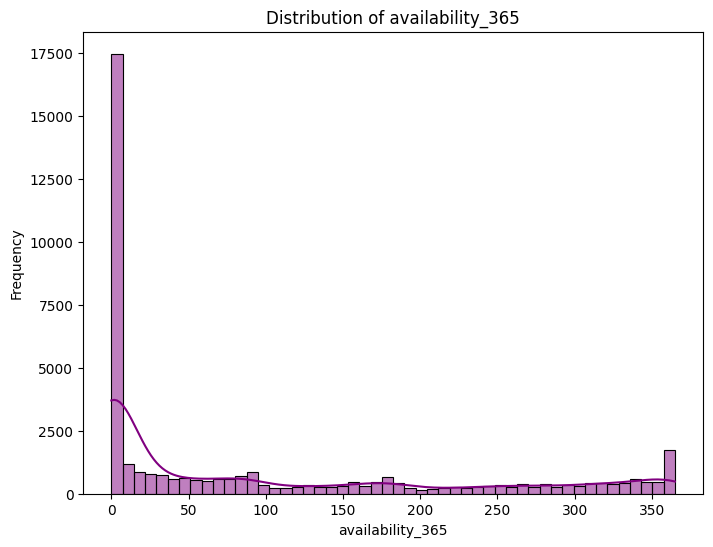

In [153]:

# Check ditribution of other variables 
# Select the variables for visualization
variables = ['neighbourhood_group', 'neighbourhood', 'latitude', 'longitude',
             'room_type', 'price', 'number_of_reviews',
             'last_review', 'reviews_per_month', 'calculated_host_listings_count',
             'availability_365']

#  Then plot the distributions for each variable
for variable in variables:
    plt.figure(figsize=(8, 6))
    sns.histplot(df2_no[variable], bins=50,color = 'purple', kde=True)
    plt.xlabel(variable)
    plt.ylabel('Frequency')
    plt.title(f'Distribution of {variable}')
    plt.show()



In [154]:
df2_no['calculated_host_listings_count'].describe()
#df2_no['calculated_host_listings_count'].unique()

count    39707.000000
mean         3.074042
std         19.751449
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max        327.000000
Name: calculated_host_listings_count, dtype: float64

> <font color = 'darkgray'> <i> </b> While using describe(),  We can conclude that the column  'calculated_host_listings_count ' is highly skewed, and if we apply IQR we will remove **roughly** the entire data, while it represents a relevant feature for further analysis. Therefore, I'll transfer it into categorical variable.  </i> </b></font>

In [155]:
df2_no['calculated_host_listings_count_group'] = 'Others'
df2_no['calculated_host_listings_count_group'][df2_no['calculated_host_listings_count'] == 1] = 'one listing'
df2_no['calculated_host_listings_count_group'][df2_no['calculated_host_listings_count'] == 2] = 'two listings'
df2_no['calculated_host_listings_count_group'][df2_no['calculated_host_listings_count'] > 2] = 'more than two listings'
df2_no['calculated_host_listings_count_group']

C:\Users\krath\AppData\Local\Temp\ipykernel_37392\3103611590.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2_no['calculated_host_listings_count_group'] = 'Others'
C:\Users\krath\AppData\Local\Temp\ipykernel_37392\3103611590.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2_no['calculated_host_listings_count_group'][df2_no['calculated_host_listings_count'] == 1] = 'one listing'
C:\Users\krath\AppData\Local\Temp\ipykernel_37392\3103611590.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats 

0        more than two listings
1                  two listings
2                   one listing
3                   one listing
4                   one listing
                  ...          
48890              two listings
48891              two listings
48892               one listing
48893    more than two listings
48894               one listing
Name: calculated_host_listings_count_group, Length: 39707, dtype: object

In [156]:
# Remove irrelevnat columns
df2_no.drop(['last_review','neighbourhood',
                   'calculated_host_listings_count','reviews_per_month','latitude','longitude'],
                  axis = 1,inplace = True)



df2_no

C:\Users\krath\AppData\Local\Temp\ipykernel_37392\947612567.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2_no.drop(['last_review','neighbourhood',


,neighbourhood_group,room_type,price,minimum_nights,number_of_reviews,availability_365,calculated_host_listings_count_group
0,Brooklyn,Private room,149,1,9,365,more than two listings
1,Manhattan,Entire home/apt,225,1,45,355,two listings
2,Manhattan,Private room,150,3,0,365,one listing
3,Brooklyn,Entire home/apt,89,1,270,194,one listing
4,Manhattan,Entire home/apt,80,10,9,0,one listing
...,...,...,...,...,...,...,...
48890,Brooklyn,Private room,70,2,0,9,two listings
48891,Brooklyn,Private room,40,4,0,36,two listings
48892,Manhattan,Entire home/apt,115,10,0,27,one listing
48893,Manhattan,Shared room,55,1,0,2,more than two listings


In [157]:
# First convert categorical variables to dummy variables using one hot encoding

categorical_vars = ['neighbourhood_group', 'room_type', 'calculated_host_listings_count_group']

df2_final = df2_no.copy()

for variable in categorical_vars:
    dummies = pd.get_dummies(df2_final[variable], prefix=variable, dtype=int)
    df2_final = pd.concat([df2_final, dummies], axis=1)
    df2_final.drop([variable], axis=1, inplace=True)
    
df2_final.head()



,price,minimum_nights,number_of_reviews,availability_365,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,calculated_host_listings_count_group_more than two listings,calculated_host_listings_count_group_one listing,calculated_host_listings_count_group_two listings
0,149,1,9,365,0,1,0,0,0,0,1,0,1,0,0
1,225,1,45,355,0,0,1,0,0,1,0,0,0,0,1
2,150,3,0,365,0,0,1,0,0,0,1,0,0,1,0
3,89,1,270,194,0,1,0,0,0,1,0,0,0,1,0
4,80,10,9,0,0,0,1,0,0,1,0,0,0,1,0


>  <font color = 'darkgray'> <i> <b> The cleaned dataset obtained after performing all the necessary preprocessing steps will now be used to train the model in the next step. </b> </i>